In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reddyml","key":"39431d0a567f14e427793578f161ca59"}'}

In [ ]:
#! mkdir ~/.kaggle
! chmod 600 kaggle.json
!kaggle datasets download -d kunalgupta2616/flickr-8k-images-with-captions

 99% 1.02G/1.04G [00:15<00:00, 92.6MB/s]
100% 1.04G/1.04G [00:15<00:00, 72.8MB/s]


In [ ]:
!kaggle datasets download -d huanghanchina/pascal-voc-2012

100% 3.63G/3.63G [01:08<00:00, 43.3MB/s]
100% 3.63G/3.63G [01:08<00:00, 57.1MB/s]


* https://www.kaggle.com/kunalgupta2616/flickr-8k-images-with-captions?select=captions.txt
* https://www.kaggle.com/huanghanchina/pascal-voc-2012


In [ ]:
#Unzipping the files
!unzip -uq "/content/flickr-8k-images-with-captions.zip" -d "drive/My Drive/PATH_TO_OUTPUT"
!unzip -uq "/content/pascal-voc-2012.zip" -d "/content/drive/My Drive/Capstone_project/Project_files/PASCAL VOC"

## Model Architecture

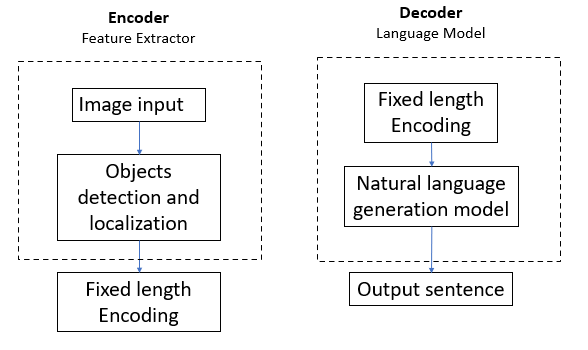

## Data Exploration

In [5]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree
from google.colab.patches import cv2_imshow
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
os.chdir('/content/drive/My Drive/Capstone_project/Project_files')
from preprocessing_functions import *

In [6]:
images_df=pd.read_csv('captions.txt', delimiter = ",")
unique_images=images_df.image.value_counts().keys()
print(len(unique_images))
images_df.head(20)

8091


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [7]:
fig, ax = plt.subplots(2, 2,figsize=(25,25))
for i in range(2):
  for j in range(2):
    rand_number=np.random.randint(0,len(unique_images)-1)
    image_path,descriptions=im_get(unique_images[rand_number],images_df)
    image=cv2.imread(image_path)
    descs_list=''
    for a in descriptions:
      descs_list= descs_list + a + '\n'
    ax[i,j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i,j].set_title(unique_images[rand_number])
    ax[i,j].set_xlabel(descs_list,fontsize='xx-large');

Output hidden; open in https://colab.research.google.com to view.

### Encoder architecture models:


* Need to identify the objects in the image and give spatial relationship between the objects.
* Deep CNN architectures can extract the feature vectors of the image.
* Feature extractor is passed onto RNN model to generate an output sentence.

#### Popular object localization and classification models:

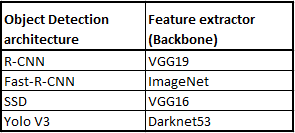

<b> VGG feature extractor <b>

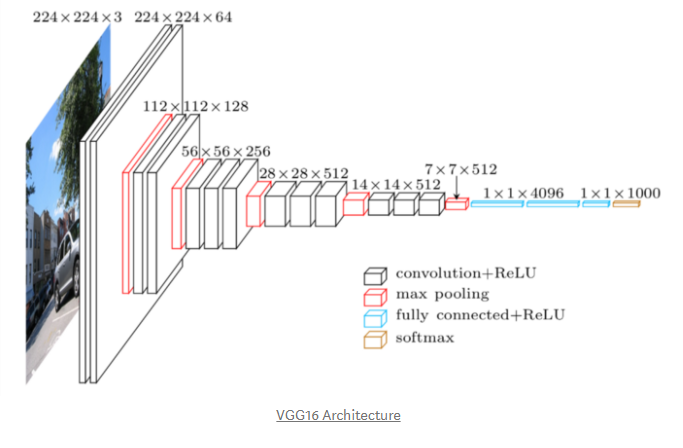

<b> RNN architecture <b>

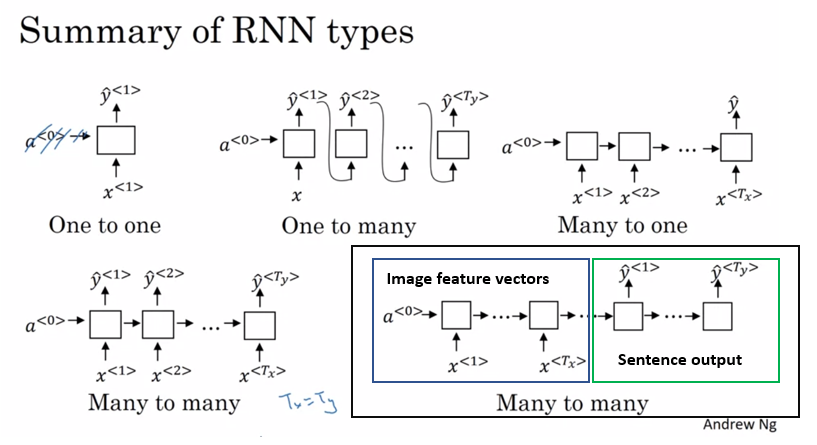

Reference: Sequence models lecture (Deeplearning.ai)



## Encoder modelling data exploration
* Pascal VOC 2012 dataset
* https://www.kaggle.com/huanghanchina/pascal-voc-2012

In [9]:
from os import listdir
from os.path import isfile,join
base_dir='/content/drive/My Drive/Capstone_project/Project_files/PASCAL VOC/VOC2012'
file_path=join(base_dir,'Annotations')
xml_files=[join(file_path,f) for f in listdir(file_path)]
print(len(xml_files))

17125


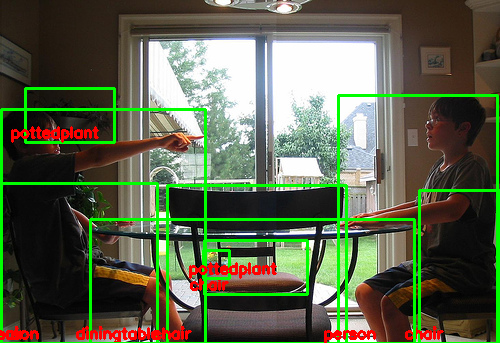

In [10]:
file_loc=join(base_dir,'JPEGImages')
#print(xml_files[1000])
random_img=np.random.randint(len(xml_files))
labels,box_cords,filename=decode_objects(xml_files[random_img])
#print(filename)
img_path=os.path.join(file_loc,filename)
img=cv2.imread(img_path,4)
for i in range(len(labels)):
    label_str=labels[i]
    thickness = 2
    x1,y1,x2,y2=box_cords[i]
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
    cv2.putText(img,label_str,(x1-15,y2-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255), 2)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2_imshow(img)

## Yolo model

<b> Grid example <b>

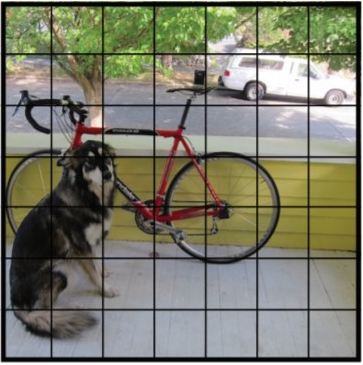

reference: https://towardsdatascience.com/yolo2-walkthrough-with-examples-e40452ca265f

<b> Darknet feature extractor for yolo <b>

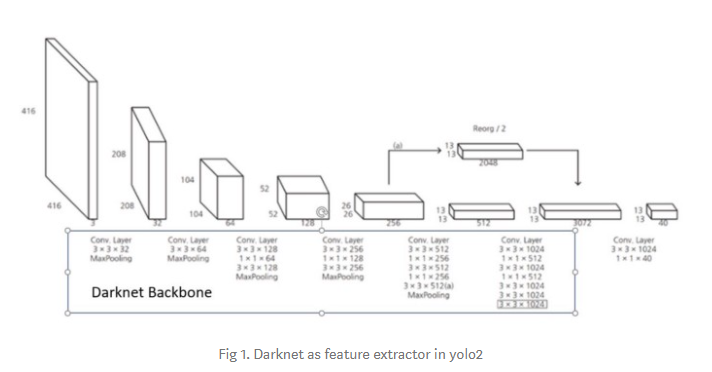

In [ ]:
# load yolov3 model
from keras.models import load_model
# load model from saved model.h5 file in local drive
model = load_model('/content/drive/My Drive/Computer_Vision_Project/Yolo/model.h5')
model.summary()

In [10]:
fig, ax = plt.subplots(2, 2,figsize=(25,25))
for i in range(2):
  for j in range(2):
    rand_number=np.random.randint(0,len(unique_images)-1)
    image_path,descriptions=im_get(unique_images[rand_number],images_df)
    image,crop_imgs=prediction_image(image_path,class_threshold=0.6,nms_threshold=0.4)
    descs_list=''
    for a in descriptions:
      descs_list= descs_list + a + '\n'
    ax[i,j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i,j].set_title(unique_images[rand_number])
    ax[i,j].set_xlabel(descs_list,fontsize='xx-large');

Output hidden; open in https://colab.research.google.com to view.